# Predicting hepatitis C virus using machine learning 
This note book looks into using various Python-based machine learning and data science libraries 
in an attenpt to build a machine learning model capable of predicting whether or not someone has 
hepatitis based on their medical attributes.

we're going to take the following steps:

    1. Problem definition
    2. data
    3. Evaluation 
    4. Featuring
    5. Modelling
    6. Experimentation 

# 1. Problem Definition

>Given clinical parameters about a patient, can we predict whether or not they have hepatitis virus?

# 2. Data
The dataset contains laboratory values of blood donors and Hepatitis C patients and demographic values like age. 
 
link: https://archive.ics.uci.edu/ml/datasets/HCV+data

kaggle version available here: 

link: https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset


* Source: The Original data came from the  University of California Irvine (UCI) ML Reository.
* Creators: Ralf Lichtinghagen, Frank Klawonn, Georg Hoffmann
* Donor1 : Ralf Lichtinghagen: Institute of Clinical Chemistry; Medical University Hannover (MHH); Hannover, Germany; lichtinghagen.ralf '@' mh-hannover.de
* Donor2 : Frank Klawonn; Helmholtz Centre for Infection Research; Braunschweig, Germany; frank.klawonn '@' helmholtz-hzi.de
* Donor2: Georg Hoffmann; Trillium GmbH; Grafrath, Germany; georg.hoffmann '@' trillium.de

# 3. Evaluating 
> if we can reach 95% accuracy predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

# 4. Features
Content of the Data:

All attributes except Category and Sex are numerical. The laboratory data are the attributes 5-14.

* 1) X (Patient ID/No.)
* 2) Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',  '2=Fibrosis', '3=Cirrhosis')
* 3) Age (in years)
* 4) Sex (f,m) # after some data manipulations female=2, male=1. for our program understands better with numeric values
* 5) ALB - Albumin: An albumin blood test measures the amount of albumin in your blood. Low albumin levels can be a sign of liver or kidney disease or another medical condition

* 6) ALP - Alkaline phosphatase is a protein found in all body tissues. Tissues with higher amounts of ALP include the liver, bile ducts, and bone. A blood test can be done to measure the level of ALP. A related test is the ALP isoenzyme test.

* 7) ALT - Alanine Transaminase. It is an enzyme found mostly in the liver. An ALT test measures the amount of ALT in the blood. When liver cells are damaged, they release ALT into the bloodstream.

* 8) AST - Aspartate Aminotransferase is an enzyme that is found mostly in the liver, but it's also in muscles and other organs in your body. When cells that contain AST are damaged, they release the AST into your blood

* 9) BIL - Bil/i: Pertaining to bile or gall (from Latin bilis). Produced by the liver and stored in the gall bladder, bile is a yellowish-green fluid that aids in the digestion of fats

* 10) CHE - Cholinesterase: An enzyme that occurs chiefly at neuromuscular junctions and promotes the hydrolysis of acetylcholine at postsynaptic receptors : acetylcholinesterase. 2 : butyrylcholinesterase.

* 11) CHOL - Cholesterol from food mostly ends up in the liver. If you are getting too much, this can increase your risk for fatty liver disease. High cholesterol also can turn fatty liver disease (steatosis) into a more serious and sometimes fatal condition known as nonalcoholic steatohepatitis (NASH).
* 12) CREA -  Creatinine: A compound that is excreted from the body in urine. Creatinine levels are measured to monitor kidney function
* 13) GGT - A gamma-glutamyl transferase (GGT) test measures the amount of GGT in the blood. GGT is an enzyme found throughout the body, but it is mostly found in the liver. When the liver is damaged, GGT may leak into the bloodstream. High levels of GGT in the blood may be a sign of liver disease or damage to the bile ducts.
* 14) PROT - proto- , prot- Combining forms meaning the first in a series; the highest in rank. [G. prōtos, first]




## Preparing the tools


* matplot for plotting data 
* numpy manipulation of data
* pandas for data analysis and manipulation
* sklearn for data modelling and evaluation 



In [1]:
# Import all the tools we need for EDA

# Regular EDA (exploratory data analyssis) and plotting lbraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# we want our plots to appear inside the notebook
%matplotlib inline 






## Data Preparation/Manipulation

In [2]:
hepatitis = pd.read_csv("data/HepatitisCdata.csv")
hepatitis

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [3]:
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [4]:
# Observe missing values
hepatitis.isna().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [5]:
# making a copy of dataframe
df = hepatitis.copy()
df[:5]

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [6]:
# Turning the category column to numeric values
hepatitis.replace("0=Blood Donor", 0, inplace=True)
hepatitis.replace("1=Hepatitis", 1, inplace=True)
hepatitis.replace("2=Fibrosis", 2, inplace=True)
hepatitis.replace("3=Cirrhosis", 3, inplace=True)
hepatitis.replace("0s=suspect Blood Donor", 4, inplace=True)
hepatitis

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [7]:
# checking missing values
hepatitis.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [8]:
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    int64  
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 67.4+ KB


In [9]:
# Find the colums which contain strings 

for label, content in hepatitis.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Sex


In [10]:
# This will turn all of the string value into category value 
for label, content in hepatitis.items():
    if pd.api.types.is_string_dtype(content):
        hepatitis[label] = content.astype("category").cat.as_ordered()

In [11]:
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  615 non-null    int64   
 1   Category    615 non-null    int64   
 2   Age         615 non-null    int64   
 3   Sex         615 non-null    category
 4   ALB         614 non-null    float64 
 5   ALP         597 non-null    float64 
 6   ALT         614 non-null    float64 
 7   AST         615 non-null    float64 
 8   BIL         615 non-null    float64 
 9   CHE         615 non-null    float64 
 10  CHOL        605 non-null    float64 
 11  CREA        615 non-null    float64 
 12  GGT         615 non-null    float64 
 13  PROT        614 non-null    float64 
dtypes: category(1), float64(10), int64(3)
memory usage: 63.3 KB


In [12]:
data = hepatitis.copy()
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [13]:
data.isna().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [14]:
# checking numerical columns
for label, content in hepatitis.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Unnamed: 0
Category
Age
ALB
ALP
ALT
AST
BIL
CHE
CHOL
CREA
GGT
PROT


In [15]:
#checking which numerical column has missing values
for label, content in hepatitis.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

ALB
ALP
ALT
CHOL
PROT


In [16]:
# Fill missing numerical columns with median 
for label, content in hepatitis.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # binary columns telling missing data
            hepatitis[label + "_is_missing"] = pd.isnull(content)
            # fill missing values with median
            hepatitis[label] = content.fillna(content.median())
        


In [17]:
hepatitis.isnull().sum()

Unnamed: 0         0
Category           0
Age                0
Sex                0
ALB                0
ALP                0
ALT                0
AST                0
BIL                0
CHE                0
CHOL               0
CREA               0
GGT                0
PROT               0
ALB_is_missing     0
ALP_is_missing     0
ALT_is_missing     0
CHOL_is_missing    0
PROT_is_missing    0
dtype: int64

In [18]:
hepatitis["ALB_is_missing"].value_counts()

ALB_is_missing
False    614
True       1
Name: count, dtype: int64

In [19]:
# check columns that are'nt numeric 
for label, content in hepatitis.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)


Sex


In [20]:
# turn categorical variables into numeric 
for label,content in hepatitis.items():
    if not pd.api.types.is_numeric_dtype(content):
        # turning categories into number adding 1
        hepatitis[label] = pd.Categorical(content).codes +1

In [21]:
# check columns that are'nt numeric 
for label, content in hepatitis.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [22]:
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       615 non-null    int64  
 1   Category         615 non-null    int64  
 2   Age              615 non-null    int64  
 3   Sex              615 non-null    int8   
 4   ALB              615 non-null    float64
 5   ALP              615 non-null    float64
 6   ALT              615 non-null    float64
 7   AST              615 non-null    float64
 8   BIL              615 non-null    float64
 9   CHE              615 non-null    float64
 10  CHOL             615 non-null    float64
 11  CREA             615 non-null    float64
 12  GGT              615 non-null    float64
 13  PROT             615 non-null    float64
 14  ALB_is_missing   615 non-null    bool   
 15  ALP_is_missing   615 non-null    bool   
 16  ALT_is_missing   615 non-null    bool   
 17  CHOL_is_missing 

In [23]:
hepatitis

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,ALB_is_missing,ALP_is_missing,ALT_is_missing,CHOL_is_missing,PROT_is_missing
0,1,0,32,2,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,False,False,False,False,False
1,2,0,32,2,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,False,False,False,False,False
2,3,0,32,2,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,False,False,False,False,False
3,4,0,32,2,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,False,False,False,False,False
4,5,0,32,2,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,False,False,False,False,False
611,612,3,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,False,False,False,False,False
612,613,3,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,False,False,False,False,False
613,614,3,46,1,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,False,True,False,False,False


In [24]:
temp_hep  = hepatitis.copy()
temp_hep 

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,ALB_is_missing,ALP_is_missing,ALT_is_missing,CHOL_is_missing,PROT_is_missing
0,1,0,32,2,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,False,False,False,False,False
1,2,0,32,2,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,False,False,False,False,False
2,3,0,32,2,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,False,False,False,False,False
3,4,0,32,2,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,False,False,False,False,False
4,5,0,32,2,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,False,False,False,False,False
611,612,3,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,False,False,False,False,False
612,613,3,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,False,False,False,False,False
613,614,3,46,1,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,False,True,False,False,False


In [25]:

temp_hep

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,ALB_is_missing,ALP_is_missing,ALT_is_missing,CHOL_is_missing,PROT_is_missing
0,1,0,32,2,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,False,False,False,False,False
1,2,0,32,2,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,False,False,False,False,False
2,3,0,32,2,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,False,False,False,False,False
3,4,0,32,2,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,False,False,False,False,False
4,5,0,32,2,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,False,False,False,False,False
611,612,3,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,False,False,False,False,False
612,613,3,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,False,False,False,False,False
613,614,3,46,1,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,False,True,False,False,False


In [26]:
hepatitis

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,ALB_is_missing,ALP_is_missing,ALT_is_missing,CHOL_is_missing,PROT_is_missing
0,1,0,32,2,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,False,False,False,False,False
1,2,0,32,2,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,False,False,False,False,False
2,3,0,32,2,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,False,False,False,False,False
3,4,0,32,2,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,False,False,False,False,False
4,5,0,32,2,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,False,False,False,False,False
611,612,3,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,False,False,False,False,False
612,613,3,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,False,False,False,False,False
613,614,3,46,1,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,False,True,False,False,False


In [27]:
# deleting unwanted columns
del hepatitis["Unnamed: 0"]
hepatitis

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,ALB_is_missing,ALP_is_missing,ALT_is_missing,CHOL_is_missing,PROT_is_missing
0,0,32,2,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,False,False,False,False,False
1,0,32,2,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,False,False,False,False,False
2,0,32,2,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,False,False,False,False,False
3,0,32,2,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,False,False,False,False,False
4,0,32,2,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,False,False,False,False,False
611,3,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,False,False,False,False,False
612,3,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,False,False,False,False,False
613,3,46,1,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,False,True,False,False,False


## Exploratory data Analysis


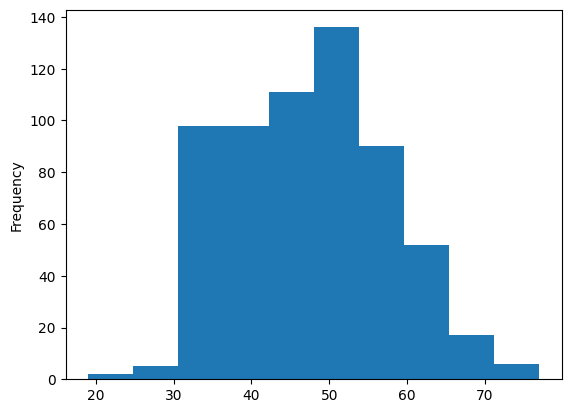

In [28]:
# Histogram of age
hepatitis["Age"].plot(kind = "hist", bins=10);

In [29]:
hepatitis["Age"].value_counts().sort_values(ascending=True)

Age
75     1
77     1
19     1
30     1
25     1
27     1
23     1
29     2
74     2
76     2
67     3
71     3
70     3
66     4
68     4
63     6
65     8
62     8
64     9
61     9
58    10
60    12
54    12
42    13
55    14
40    14
39    15
41    16
36    16
57    16
32    17
59    18
34    19
45    19
38    20
53    20
37    20
43    20
47    20
56    20
44    20
35    21
49    21
50    21
52    22
51    24
33    25
48    28
46    32
Name: count, dtype: int64

In [30]:
over_30 = hepatitis[hepatitis["Age"]>30]
over_30

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,ALB_is_missing,ALP_is_missing,ALT_is_missing,CHOL_is_missing,PROT_is_missing
0,0,32,2,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,False,False,False,False,False
1,0,32,2,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,False,False,False,False,False
2,0,32,2,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,False,False,False,False,False
3,0,32,2,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,False,False,False,False,False
4,0,32,2,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,False,False,False,False,False
611,3,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,False,False,False,False,False
612,3,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,False,False,False,False,False
613,3,46,1,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,False,True,False,False,False


In [31]:
hepatitis["CHE"].min()

1.42

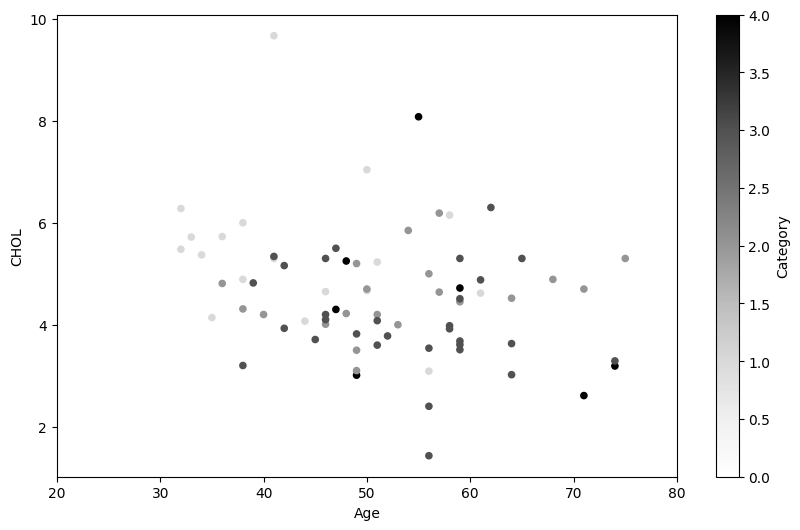

In [32]:
fig, ax= plt.subplots(figsize=(10, 6))
over_30.plot(kind ='scatter',
            x='Age',
            y='CHOL',
            c='Category',
            ax=ax);
ax.set_xlim((20, 80));

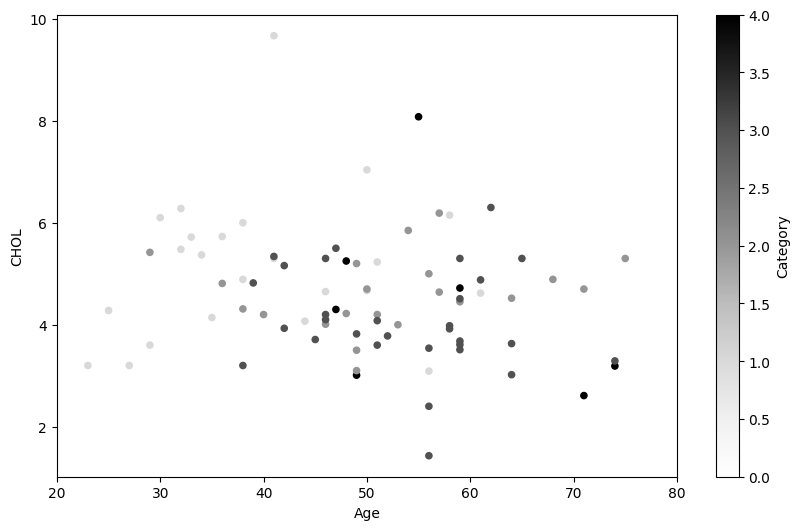

In [33]:
fig, ax= plt.subplots(figsize=(10, 6))
hepatitis.plot(kind ='scatter',
            x='Age',
            y='CHOL',
            c='Category',
            ax=ax);
ax.set_xlim((20, 80));

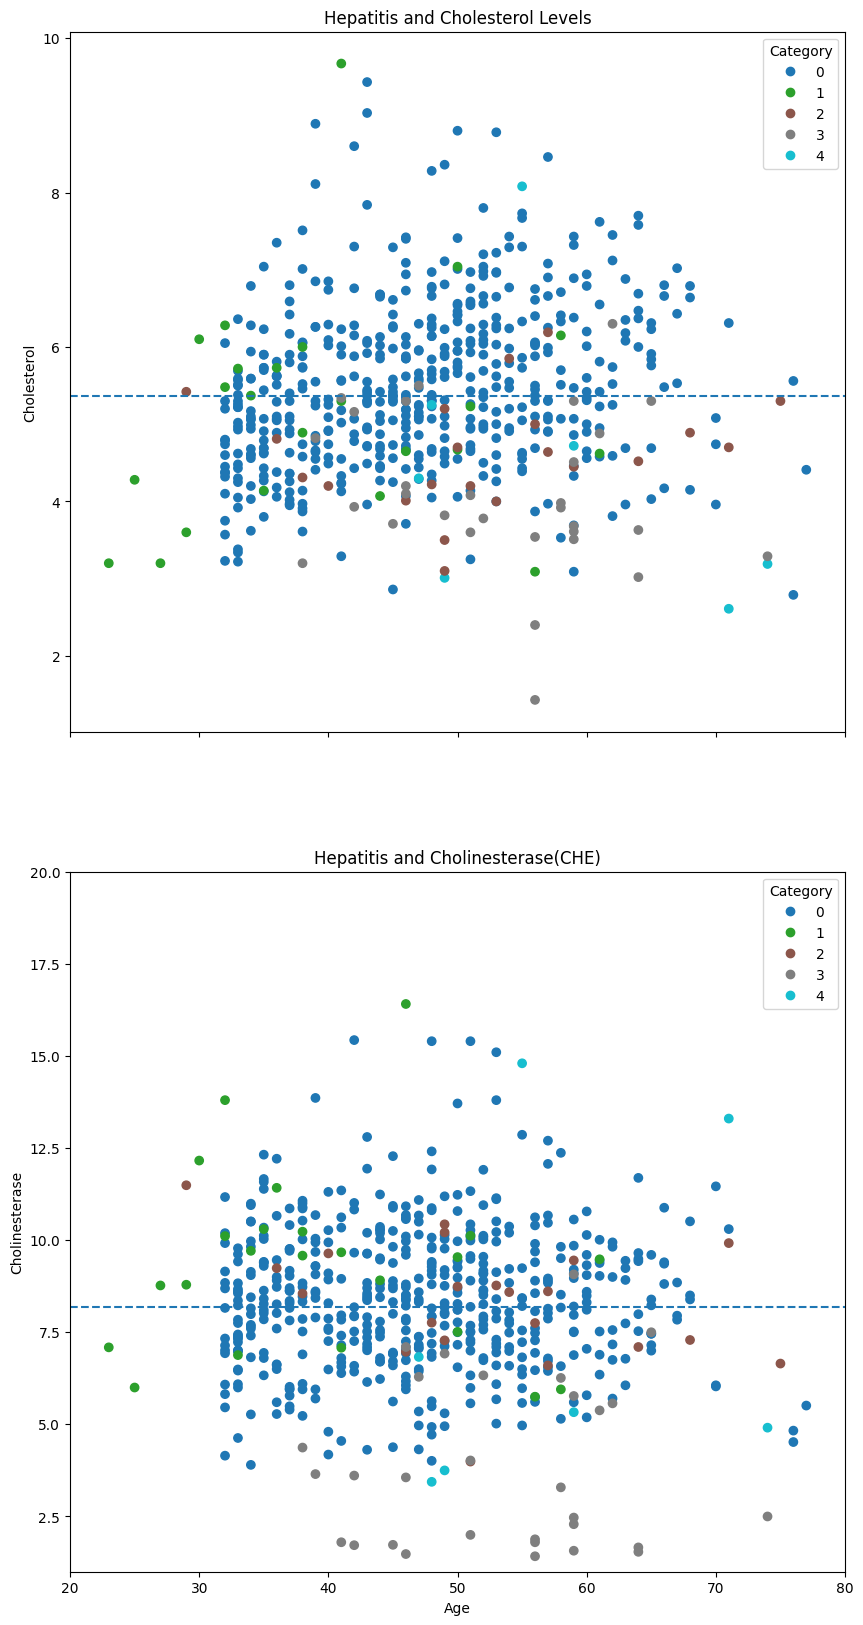

In [34]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols =1,
                              figsize = (10, 20), 
                              sharex = True)

# Add data to ax0
scatter = ax0.scatter(x = hepatitis["Age"],
                    y = hepatitis["CHOL"],
                    c = hepatitis["Category"],
                     cmap = 'tab10')
#customize ax0
ax0.set(title= "Hepatitis and Cholesterol Levels",
      ylabel= "Cholesterol")
# change the x axis limits
ax0.set_xlim([20,80])
# add legend
ax0.legend(*scatter.legend_elements(), title= "Category")

# Add a horizontal line

ax0.axhline(hepatitis["CHOL"].mean(),
          linestyle = '--');

# Add data to ax1
scatter = ax1.scatter(x = hepatitis["Age"],
                    y = hepatitis["CHE"],
                    c = hepatitis["Category"],
                     cmap = 'tab10')
#customize ax1
ax1.set(title= "Hepatitis and Cholinesterase(CHE)",
      xlabel= "Age",
      ylabel= "Cholinesterase")
# Change ax1 x axis limits

ax1.set_ylim([1, 20])
# add legend ax1
ax1.legend(*scatter.legend_elements(), title= "Category")

# Add a horizontal line

ax1.axhline(hepatitis["CHE"].mean(),
          linestyle = '--');




In [35]:
hepatitis

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,ALB_is_missing,ALP_is_missing,ALT_is_missing,CHOL_is_missing,PROT_is_missing
0,0,32,2,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,False,False,False,False,False
1,0,32,2,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,False,False,False,False,False
2,0,32,2,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,False,False,False,False,False
3,0,32,2,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,False,False,False,False,False
4,0,32,2,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,False,False,False,False,False
611,3,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,False,False,False,False,False
612,3,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,False,False,False,False,False
613,3,46,1,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,False,True,False,False,False


In [36]:
hepatitis["ALB"].value_counts().sum()

615

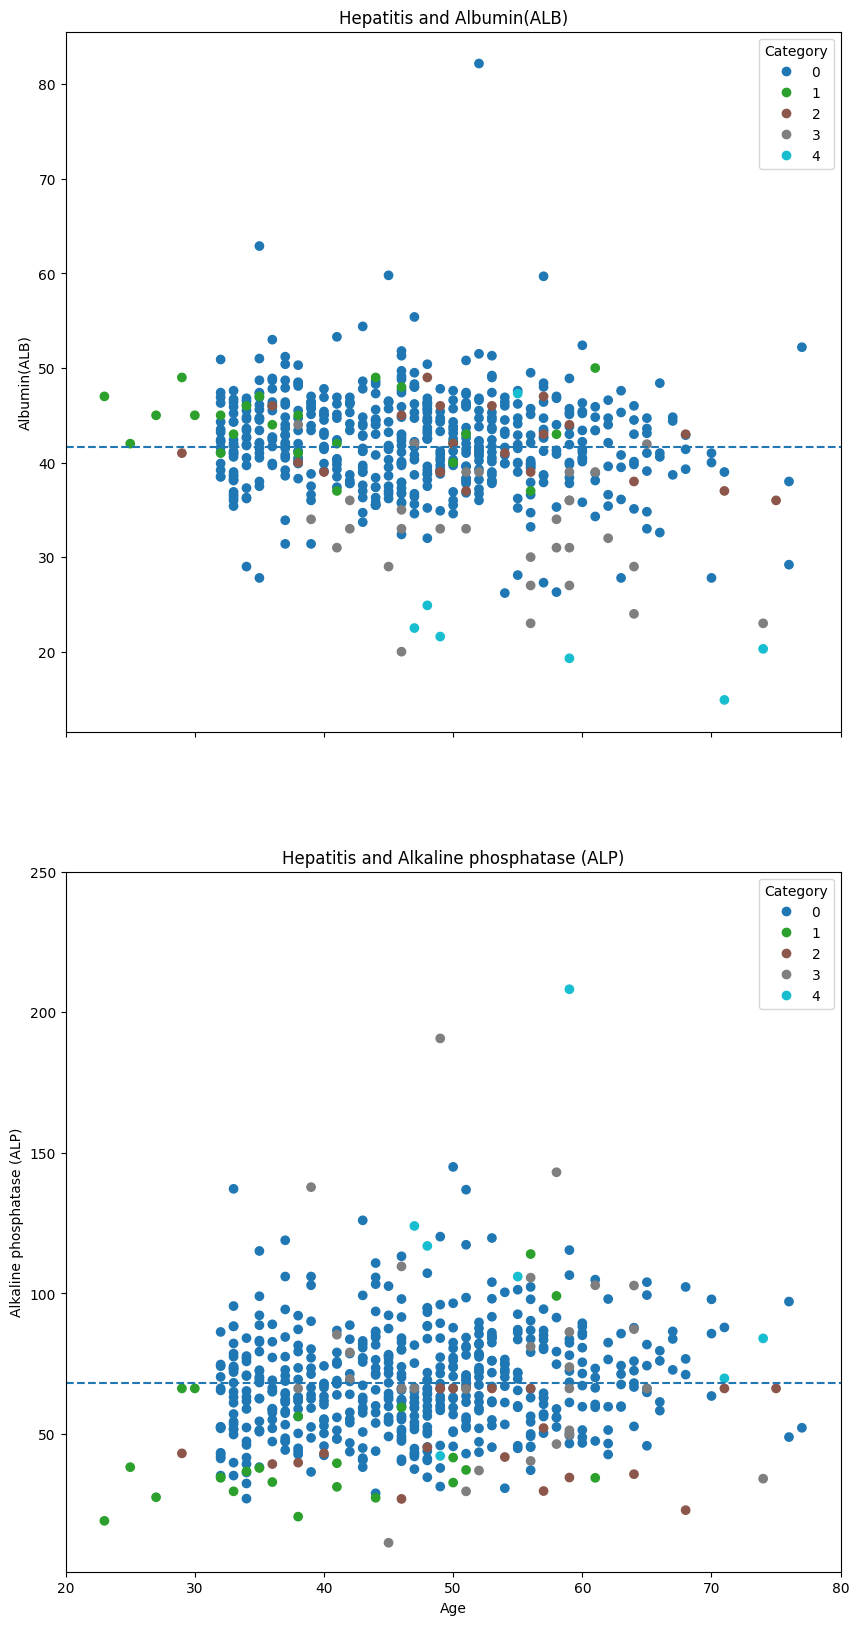

In [37]:
fig, (ax2, ax3) = plt.subplots(nrows=2,
                              ncols =1,
                              figsize = (10, 20), 
                              sharex = True)

# Add data to ax0
scatter = ax2.scatter(x = hepatitis["Age"],
                    y = hepatitis["ALB"],
                    c = hepatitis["Category"],
                     cmap = 'tab10')
#customize ax0
ax2.set(title= "Hepatitis and Albumin(ALB)",
      ylabel= "Albumin(ALB)")
# change the x axis limits
ax2.set_xlim([20,80])
# add legend
ax2.legend(*scatter.legend_elements(), title= "Category")

# Add a horizontal line

ax2.axhline(hepatitis["ALB"].mean(),
          linestyle = '--');

# Add data to ax1
scatter = ax3.scatter(x = hepatitis["Age"],
                    y = hepatitis["ALP"],
                    c = hepatitis["Category"],
                     cmap = 'tab10')
#customize ax1
ax3.set(title= "Hepatitis and Alkaline phosphatase (ALP)",
      xlabel= "Age",
      ylabel= "Alkaline phosphatase (ALP)")
# Change ax1 x axis limits

ax3.set_ylim([1,250])
# add legend ax1
ax3.legend(*scatter.legend_elements(), title= "Category")

# Add a horizontal line

ax3.axhline(hepatitis["ALP"].mean(),
          linestyle = '--');



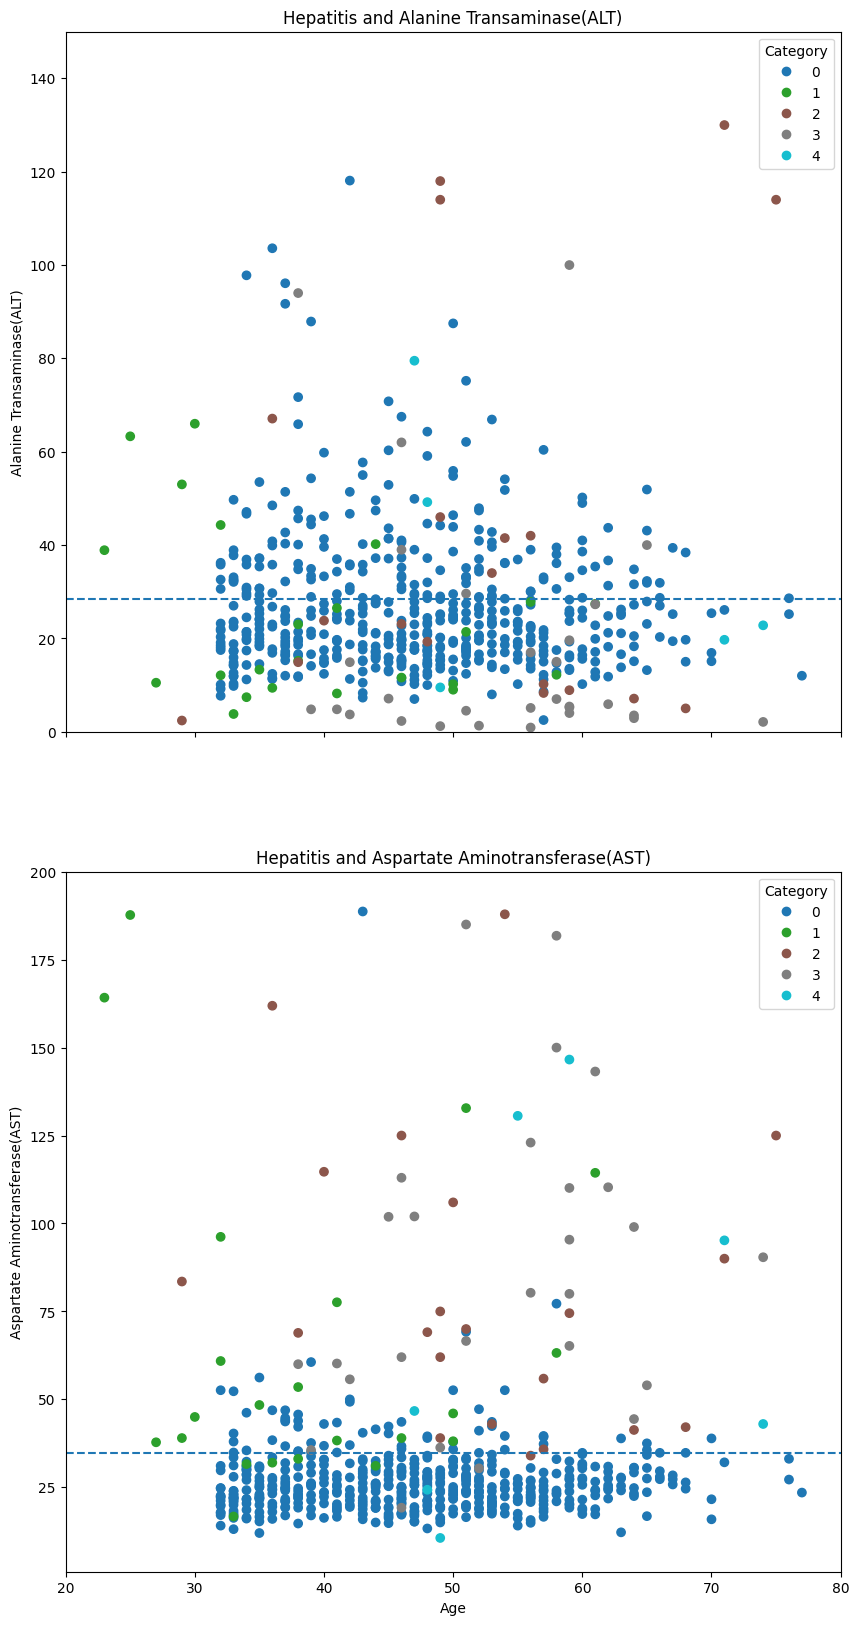

In [38]:
fig, (ax4, ax5) = plt.subplots(nrows=2,
                              ncols =1,
                              figsize = (10, 20), 
                              sharex = True)

# Add data to ax0
scatter = ax4.scatter(x = hepatitis["Age"],
                    y = hepatitis["ALT"],
                    c = hepatitis["Category"],
                     cmap = 'tab10')
#customize ax0
ax4.set(title= "Hepatitis and Alanine Transaminase(ALT)",
      ylabel= "Alanine Transaminase(ALT)")
# change the x axis limits
ax4.set_xlim([20,80])
ax4.set_ylim([0, 150])
# add legend
ax4.legend(*scatter.legend_elements(), title= "Category")

# Add a horizontal line

ax4.axhline(hepatitis["ALT"].mean(),
          linestyle = '--');

# Add data to ax1
scatter = ax5.scatter(x = hepatitis["Age"],
                    y = hepatitis["AST"],
                    c = hepatitis["Category"],
                     cmap = 'tab10')
#customize ax1
ax5.set(title= "Hepatitis and Aspartate Aminotransferase(AST)",
      xlabel= "Age",
      ylabel= "Aspartate Aminotransferase(AST)")
# Change ax1 x axis limits

ax5.set_ylim([1,200])
# add legend ax1
ax5.legend(*scatter.legend_elements(), title= "Category")

# Add a horizontal line

ax5.axhline(hepatitis["AST"].mean(),
          linestyle = '--');



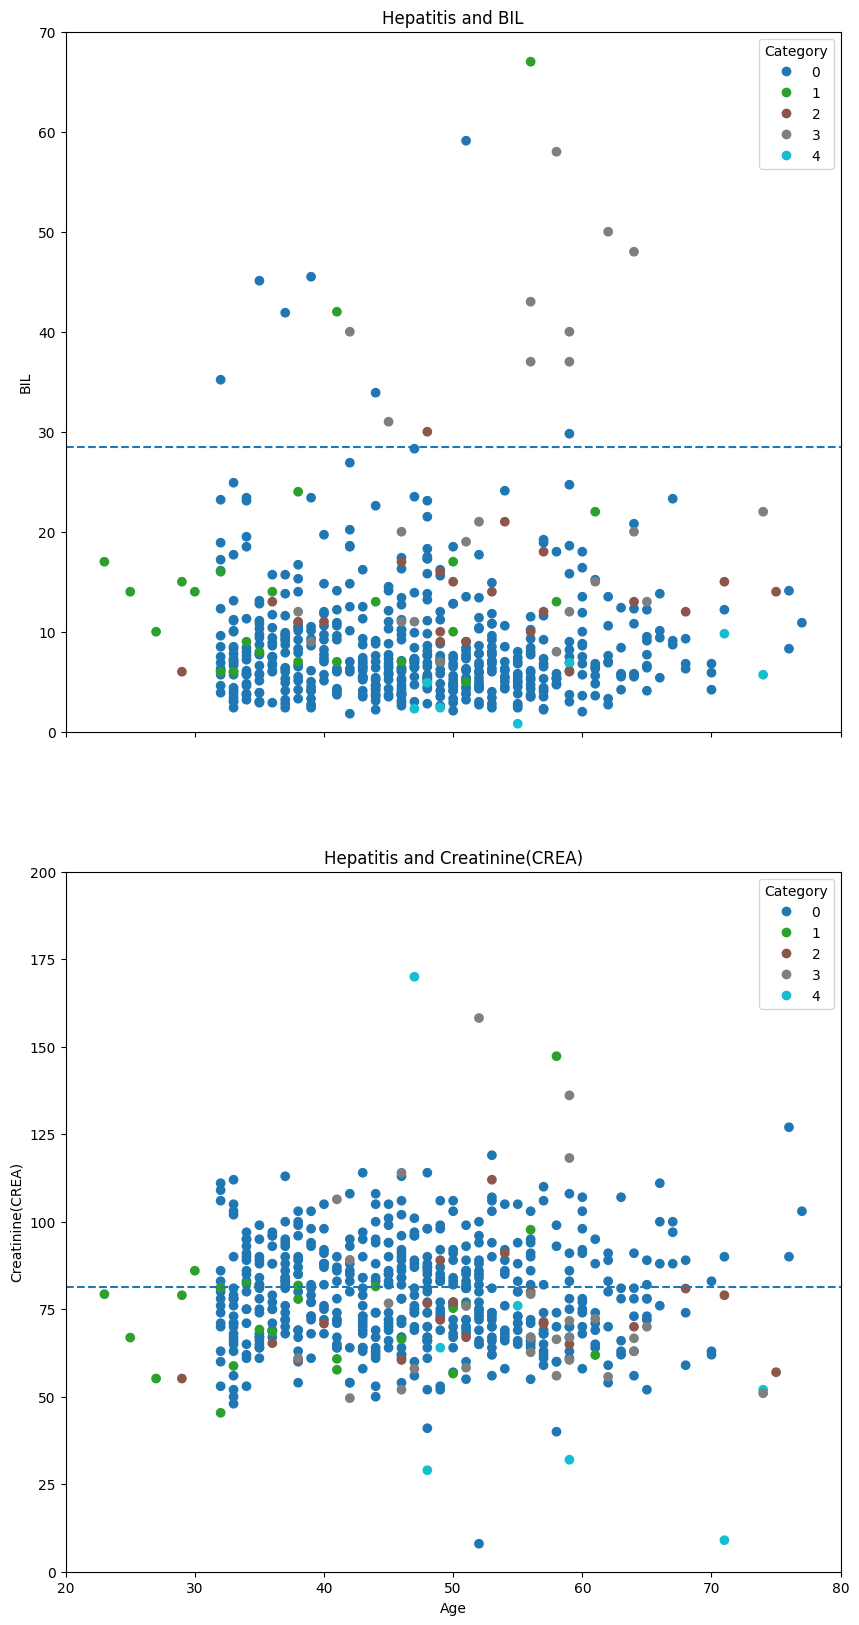

In [39]:
fig, (ax6, ax7) = plt.subplots(nrows=2,
                              ncols =1,
                              figsize = (10, 20), 
                              sharex = True)

# Add data to ax0
scatter = ax6.scatter(x = hepatitis["Age"],
                    y = hepatitis["BIL"],
                    c = hepatitis["Category"],
                     cmap = 'tab10')
#customize ax0
ax6.set(title= "Hepatitis and BIL",
      ylabel= "BIL")
# change the x axis limits
ax6.set_xlim([20,80])
ax6.set_ylim([0,70])
# add legend
ax6.legend(*scatter.legend_elements(), title= "Category")

# Add a horizontal line

ax6.axhline(hepatitis["ALT"].mean(),
          linestyle = '--');

# Add data to ax1
scatter = ax7.scatter(x = hepatitis["Age"],
                    y = hepatitis["CREA"],
                    c = hepatitis["Category"],
                     cmap = 'tab10')
#customize ax1
ax7.set(title= "Hepatitis and Creatinine(CREA)",
      xlabel= "Age",
      ylabel= "Creatinine(CREA)")
# Change ax1 x axis limits

ax7.set_ylim([0,200])
# add legend ax1
ax7.legend(*scatter.legend_elements(), title= "Category")

# Add a horizontal line

ax7.axhline(hepatitis["CREA"].mean(),
          linestyle = '--');



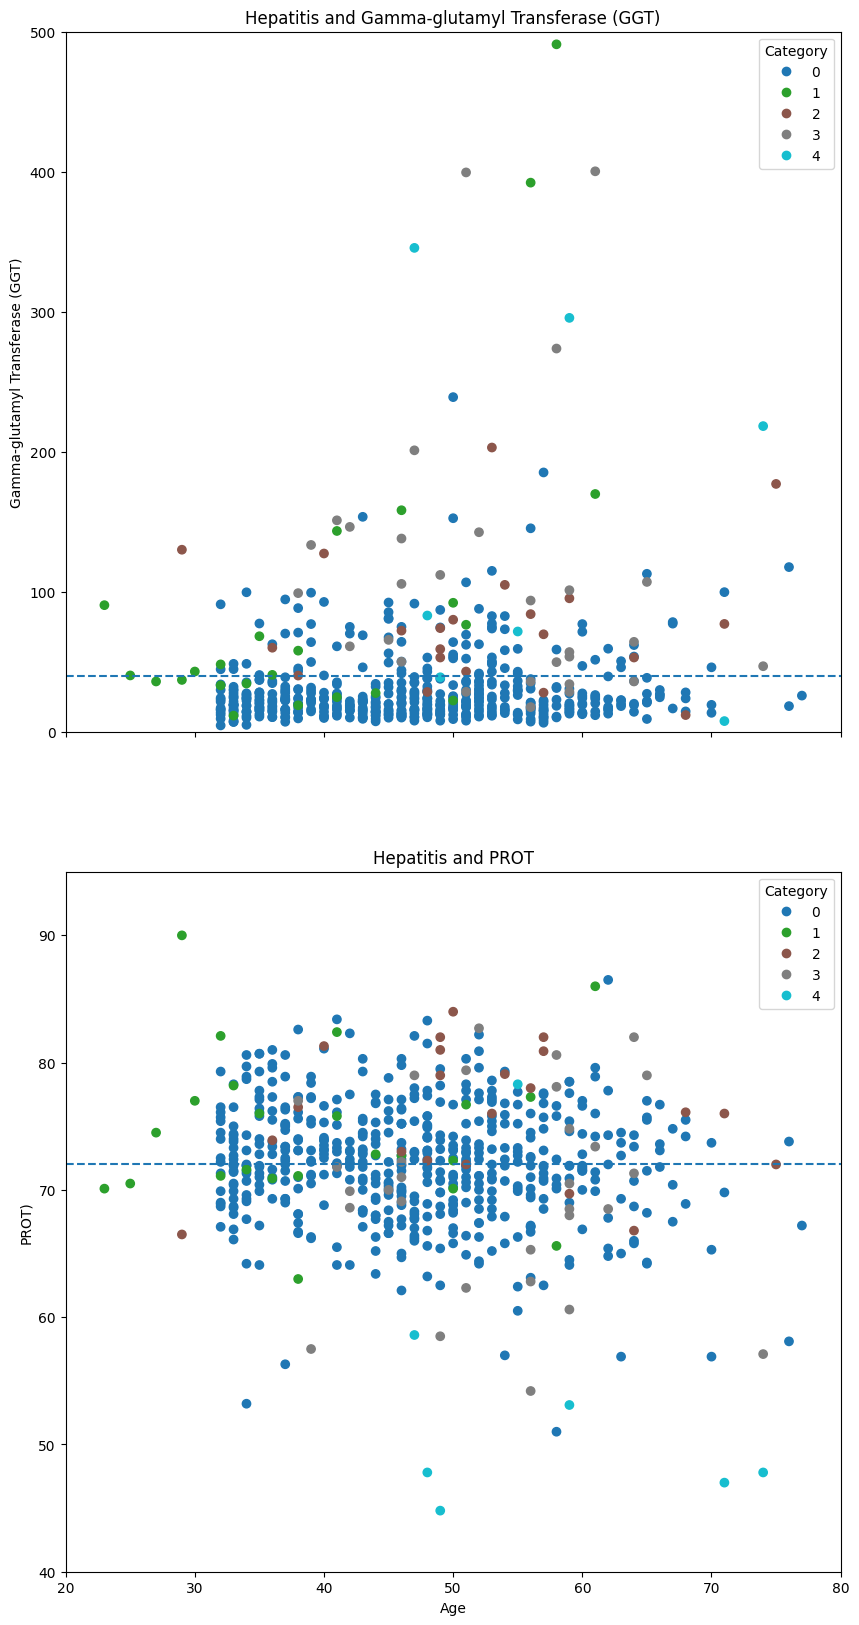

In [40]:
fig, (ax8, ax9) = plt.subplots(nrows=2,
                              ncols =1,
                              figsize = (10, 20), 
                              sharex = True)

# Add data to ax0
scatter = ax8.scatter(x = hepatitis["Age"],
                    y = hepatitis["GGT"],
                    c = hepatitis["Category"],
                     cmap = 'tab10')
#customize ax0
ax8.set(title= "Hepatitis and Gamma-glutamyl Transferase (GGT)",
      ylabel= "Gamma-glutamyl Transferase (GGT)")
# change the x axis limits
ax8.set_xlim([20,80])
ax8.set_ylim([0,500])
# add legend
ax8.legend(*scatter.legend_elements(), title= "Category")

# Add a horizontal line

ax8.axhline(hepatitis["GGT"].mean(),
          linestyle = '--');

# Add data to ax1
scatter = ax9.scatter(x = hepatitis["Age"],
                    y = hepatitis["PROT"],
                    c = hepatitis["Category"],
                     cmap = 'tab10')
#customize ax1
ax9.set(title= "Hepatitis and PROT",
      xlabel= "Age",
      ylabel= "PROT)")
# Change ax1 x axis limits

ax9.set_ylim([40,95])
# add legend ax1
ax9.legend(*scatter.legend_elements(), title= "Category")

# Add a horizontal line

ax9.axhline(hepatitis["PROT"].mean(),
          linestyle = '--');


In [41]:
hepatitis

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,ALB_is_missing,ALP_is_missing,ALT_is_missing,CHOL_is_missing,PROT_is_missing
0,0,32,2,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,False,False,False,False,False
1,0,32,2,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,False,False,False,False,False
2,0,32,2,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,False,False,False,False,False
3,0,32,2,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,False,False,False,False,False
4,0,32,2,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,False,False,False,False,False
611,3,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,False,False,False,False,False
612,3,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,False,False,False,False,False
613,3,46,1,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,False,True,False,False,False


In [42]:
hepatitis.corr()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,ALB_is_missing,ALP_is_missing,ALT_is_missing,CHOL_is_missing,PROT_is_missing
Category,1.000000,0.159327,0.068305,-0.407778,0.116021,0.215792,0.613151,0.422480,-0.335330,-0.305833,0.158393,0.502025,-0.160042,0.129607,0.385588,0.033631,0.076562,0.129607
Age,0.159327,1.000000,-0.024544,-0.196842,0.168080,-0.005690,0.088666,0.032492,-0.075093,0.123789,-0.022296,0.153087,-0.153672,0.070663,0.027512,-0.037791,0.024209,-0.005656
Sex,0.068305,-0.024544,1.000000,0.146138,-0.019808,0.161502,0.130891,0.111177,0.169111,-0.029251,0.159589,0.133276,0.051288,0.032065,0.019130,0.032065,-0.082622,0.032065
ALB,-0.407778,-0.196842,0.146138,1.000000,-0.138015,0.001444,-0.193342,-0.221641,0.375817,0.204731,-0.001594,-0.155440,0.549975,0.002302,-0.060547,0.023630,0.008560,-0.151188
ALP,0.116021,0.168080,-0.019808,-0.138015,1.000000,0.166320,0.059637,0.046780,0.033750,0.123197,0.149831,0.440012,-0.055869,-0.003186,-0.013707,-0.018777,0.050708,-0.003186
ALT,0.215792,-0.005690,0.161502,0.001444,0.166320,1.000000,0.273333,-0.038388,0.146729,0.067716,-0.043000,0.248208,0.095016,0.018343,0.458276,-0.008637,0.013894,0.053257
AST,0.613151,0.088666,0.130891,-0.193342,0.059637,0.273333,1.000000,0.312231,-0.208536,-0.207938,-0.021387,0.491263,0.039999,0.023452,0.186681,-0.002058,0.056940,0.095465
BIL,0.422480,0.032492,0.111177,-0.221641,0.046780,-0.038388,0.312231,1.000000,-0.333172,-0.157282,0.031224,0.217024,-0.040729,0.003292,0.132432,-0.009027,0.133641,0.498072
CHE,-0.335330,-0.075093,0.169111,0.375817,0.033750,0.146729,-0.208536,-0.333172,1.000000,0.420215,-0.011157,-0.110345,0.293041,-0.012757,-0.057032,0.025332,-0.008379,-0.122994
CHOL,-0.305833,0.123789,-0.029251,0.204731,0.123197,0.067716,-0.207938,-0.157282,0.420215,1.000000,-0.047437,-0.007185,0.206255,-0.002408,-0.124652,0.022757,-0.007672,-0.002408


In [43]:
corr_metrix = hepatitis.corr()
import seaborn as sns

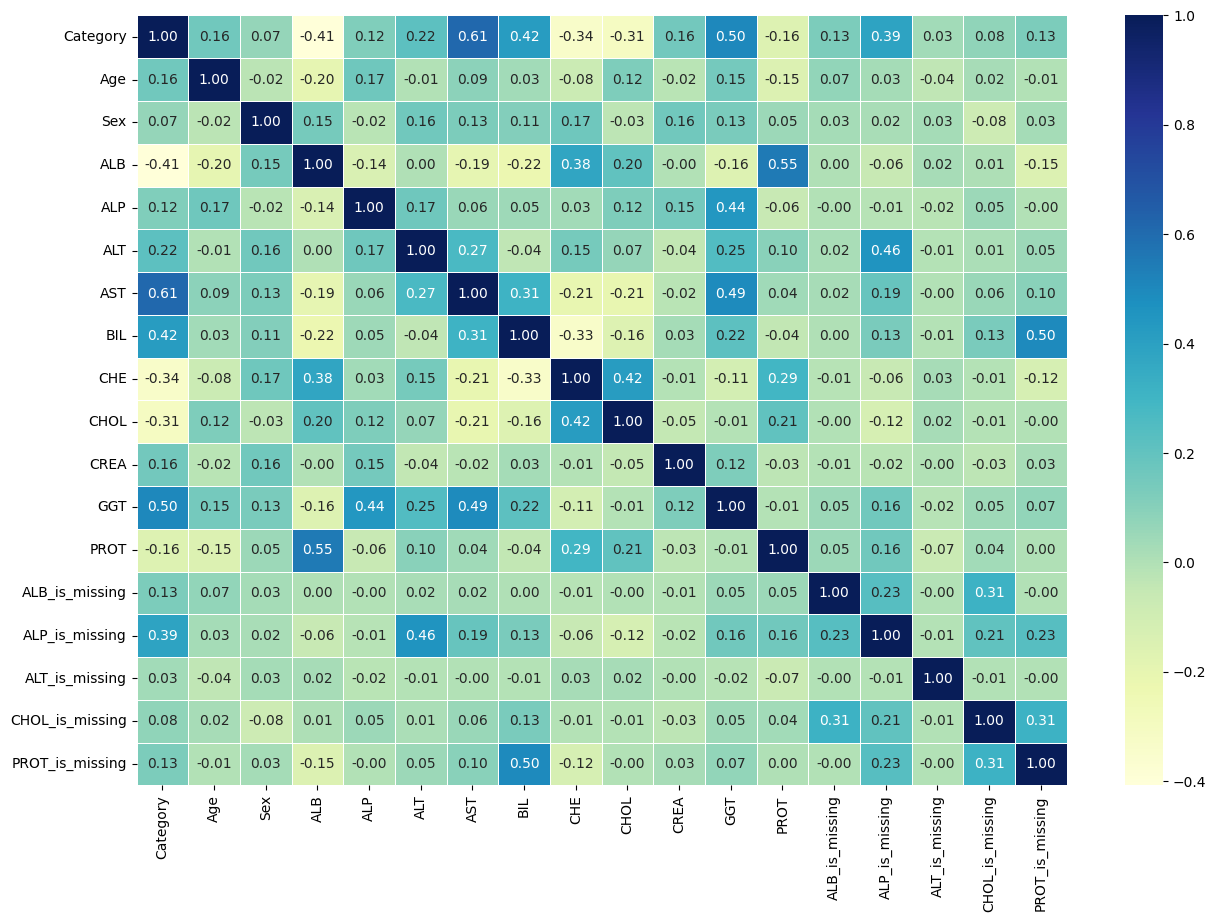

In [44]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_metrix,
                annot =True,
                linewidths = 0.5,
                fmt= ".2f",
                cmap = "YlGnBu" );

## Modelling

In [45]:
hepatitis_df = hepatitis.copy()
hepatitis_df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,ALB_is_missing,ALP_is_missing,ALT_is_missing,CHOL_is_missing,PROT_is_missing
0,0,32,2,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,False,False,False,False,False
1,0,32,2,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,False,False,False,False,False
2,0,32,2,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,False,False,False,False,False
3,0,32,2,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,False,False,False,False,False
4,0,32,2,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,False,False,False,False,False
611,3,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,False,False,False,False,False
612,3,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,False,False,False,False,False
613,3,46,1,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,False,True,False,False,False


In [46]:
del hepatitis_df["ALB_is_missing"]
del hepatitis_df[ "ALP_is_missing"]
del hepatitis_df["ALT_is_missing"]
del hepatitis_df["CHOL_is_missing"]
del hepatitis_df["PROT_is_missing"]

In [47]:
hepatitis_df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,2,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,2,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,2,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,2,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,2,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3,46,1,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [48]:
cleaned_data = hepatitis_df.copy()
cleaned_data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,2,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,2,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,2,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,2,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,2,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3,46,1,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [49]:
# converting sex column to object type
cleaned_data["Sex"].replace(2, "male", inplace=True)
cleaned_data["Sex"].replace(1, "female", inplace=True)


In [56]:
cleaned_data.columns.str.lower()


Index(['category', 'age', 'sex', 'alb', 'alp', 'alt', 'ast', 'bil', 'che',
       'chol', 'crea', 'ggt', 'prot'],
      dtype='object')

In [50]:
cleaned_data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,male,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,male,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,male,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,male,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,male,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3,62,female,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3,64,female,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3,64,female,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3,46,female,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [51]:
categorical_columns = cleaned_data.select_dtypes(include=['object'])

# Print the categorical columns
print(categorical_columns.columns)

Index(['Sex'], dtype='object')


In [ ]:
# Spliting data into features(x) and label(y)

x = hepatitis_df.drop("Category", axis = 1)
y = hepatitis_df["Category"]

In [ ]:
# Spliting data into train and test sets
np.random.seed(42)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train

In [ ]:
 x_test

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


 Comparing 3 different machine learning models for our data:
 1. logistic regression
 2. K-NearestNeigbour
 3. Random Forest Classifier

In [ ]:
# Put models in a dictionary

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier (),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score model 
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fit and evaluate given machine learning models.
    model : a dict different sklearn ml model
    x_train : trainig data (no labels)
    x_text : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    
    """
    # set random seed 
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models 
    for name, model in models.items():
        #Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append it's score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models = models,
                            x_train = x_train,
                            x_test = x_test,
                            y_train = y_train,
                            y_test = y_test)

model_scores

In [ ]:
model_compare = pd.DataFrame(model_scores, index= ["accuracy"])
model_compare.T.plot.bar();

## Hyperparameter tuning with RandimizedSearchCV

 Tunning 
* RandomForestClassifier()
* LogisticRegression()

using RandimizedSearchCV

In [ ]:
# Create a hyperparameter grid for logisticRegression
log_reg_grid ={"C": np.logspace(-4, 4, 20),
              "solver" : ["liblinear"]}

# Create a hyperparameter grid for RandomForestRegressor
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:


# setup random hyperparameter search for a LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True,
                               random_state= 42)

# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)


In [ ]:
rs_log_reg.best_params_

In [ ]:

#  Setup random hyperparameter search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True,
                          random_state=42)

rs_rf.fit(x_train, y_train)

In [52]:
rs_rf.best_params_

NameError: name 'rs_rf' is not defined

In [ ]:
# Evaluating the randomizedsearched  model 
rs_log_reg.score(x_test, y_test)


In [ ]:
rs_rf.score(x_test, y_test)

## hyperparameter tuning with GridSearchCv


In [ ]:
%%time
# Different Hyperparameters for our LogisticRegression model 

log_reg_gs={"C": np.logspace(-4, 4, 30),
              "solver" : ["liblinear"]}



rf_gs = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}



In [ ]:
# Create a hyperparameter grid for LogisticRegression
gs_log_model = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_gs,
                          cv = 5,
                          verbose = True)

gs_log_model.fit(x_train, y_train)

In [ ]:
gs_log_model.best_params_

In [ ]:
gs_log_model.score(x_test, y_test)

## since logistics regression model gave the best score lets make focus more on tuning with best parameter and save model for prediction 

In [ ]:
# Instantiating a LogisticRegression classifier using the best hyperparameters from RandomizedSearchCV
clf_hepatitis_model = LogisticRegression(solver = 'liblinear', C =  1.3738237958832638)

# Fitting the new instance of LogisticRegression with the best hyperparameters on the training databest_para = {'solver': 'liblinear', 'C': 1.3738237958832638}
clf_hepatitis_model.fit(x_train, y_train)
clf_hepatitis_model.score(x_test, y_test)

In [ ]:
# Make predictions on test data 
y_preds = clf_hepatitis_model.predict(x_test)

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds)

In [ ]:
# Creating a more visual confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cmap='GnBu')
sns.set(font_scale=2)

In [ ]:
# Classification Report 
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_preds)
print(class_report)

In [ ]:
# ROC (receiver operator characteristic) curve & AUC (area under curve)
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf_hepatitis_model, x_test, y_test);